<img src="img1.jpg" align=”center”>
<h1>Previsão de transações bancárias de 200.000 clientes Santander</h1> <br>
Projeto criado por <b>Alessandra Faria Abreu</b> enquanto ouvia Banda Eva e tomava café <br>
Desafio disponivel no <a href="https://www.kaggle.com/c/santander-customer-transaction-prediction">Kaggle</a>

<p>Importação das bibliotecas<p>

In [3]:
#permite que os gráficos gerados sejam mostrados na mesma janela
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model 
from sklearn.model_selection import train_test_split 
#import plotly.graph_objs as go
#define o estilo dos gráficos , "ggplot" é um estilo popular em R
plt.style.use('ggplot') 

<p>Leitura das bases<p>

In [4]:
#@title Default title text
#Realiza a leitura da base (csv) e carrega na mémoria
transacoesTrain = pd.read_csv('train.csv')
transacoesTest = pd.read_csv('test.csv')

<h1>Exploração das Bases</h1><br>
<h2>Visualização da relação de dados da base Train - Dados</h2>

In [3]:
#Visualizar os 5 primeiros registros da base
transacoesTrain.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
#Resumo dos dados registrados na Base
transacoesTrain.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [5]:
#Tipo de dado por coluna - para verificar se são todos numericos
transacoesTrain.dtypes.head()

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
dtype: object

In [6]:
#Quantidade de linhas e colunas
transacoesTrain.shape

(200000, 202)

In [7]:
#Verifica se tem valores nulos Train
transacoesTrain.isnull().any().any()

False

In [8]:
#Verifica se tem valores nulos Test
transacoesTest.isnull().any().any()

False

<h2>Visualização das Bases - Gráficos</h2>

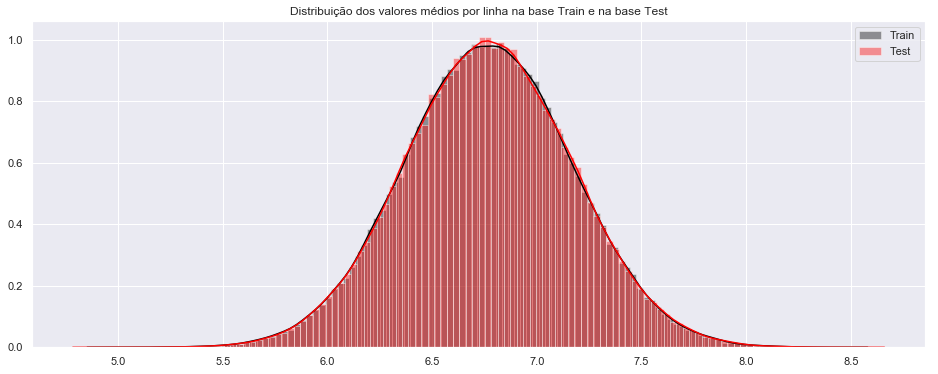

In [12]:
#Distribuição dos valores médios - comparativo LINHA
plt.figure(figsize=(16,6))
features = transacoesTrain.columns.values[2:202]
plt.title("Distribuição dos valores médios por linha na base Train e na base Test")
sns.distplot(transacoesTrain[features].mean(axis=1),color="black", kde=True,bins=120, label='Train')
sns.distplot(transacoesTest[features].mean(axis=1),color="red", kde=True,bins=120, label='Test')
plt.legend()
plt.show()

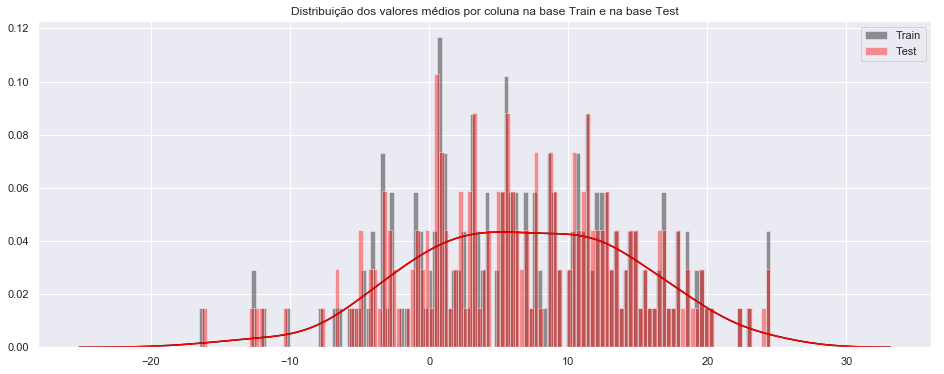

In [13]:
plt.figure(figsize=(16,6))
plt.title("Distribuição dos valores médios por coluna na base Train e na base Test")
sns.distplot(transacoesTrain[features].mean(axis=0),color="black",kde=True,bins=120, label='Train')
sns.distplot(transacoesTest[features].mean(axis=0),color="red", kde=True,bins=120, label='Test')
plt.legend()
plt.show()

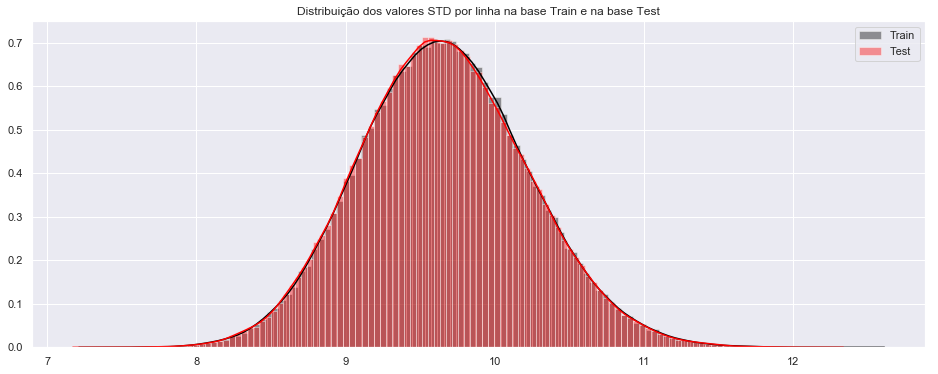

In [14]:
#Distribuição dos valores std - comparativo LINHA
plt.figure(figsize=(16,6))
features = transacoesTrain.columns.values[2:202]
plt.title("Distribuição dos valores STD por linha na base Train e na base Test")
sns.distplot(transacoesTrain[features].std(axis=1),color="black", kde=True,bins=120, label='Train')
sns.distplot(transacoesTest[features].std(axis=1),color="red", kde=True,bins=120, label='Test')
plt.legend()
plt.show()

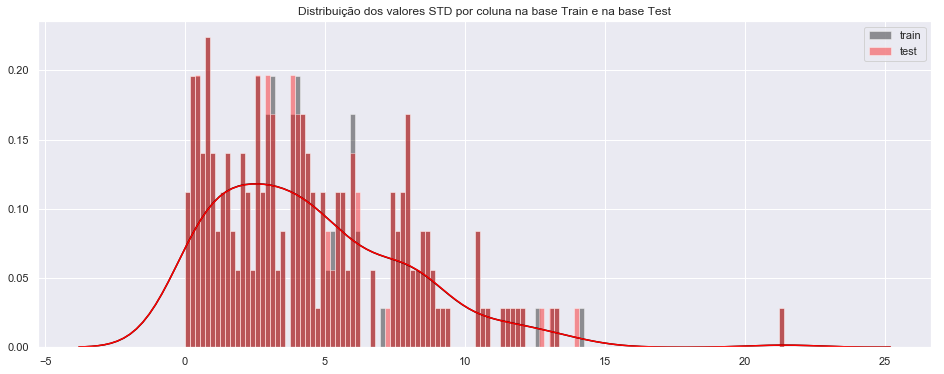

In [15]:
plt.figure(figsize=(16,6))
plt.title("Distribuição dos valores STD por coluna na base Train e na base Test")
sns.distplot(transacoesTrain[features].std(axis=0),color="black",kde=True,bins=120, label='train')
sns.distplot(transacoesTest[features].std(axis=0),color="red", kde=True,bins=120, label='test')
plt.legend(); plt.show()

<p>Visualizações sobre o balanceamento da base<p>

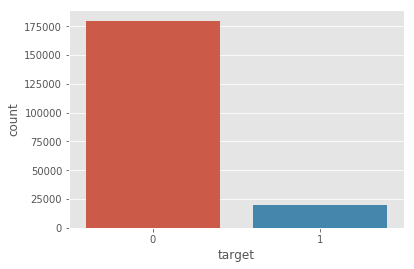

In [9]:
sns.countplot(transacoesTrain['target'])

C:\Users\Alessandra Faria\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


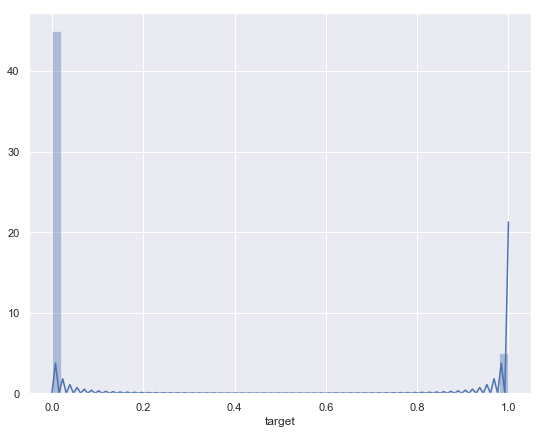

In [10]:
#Mostra que o target é desbalanceado
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(transacoesTrain['target']);

<h1>Reamostragem</h1>

<p>Como visto nos gráficos acima o modelo esta desbalanceado</p></br>
<p>Realizei a validação sem balancear e os resultados  foram inaceitaveis como mostra o gráfico da Matriz de confusão a seguir :</p>

Confusion matrix:
 [[53959     0]
 [ 6041     0]]


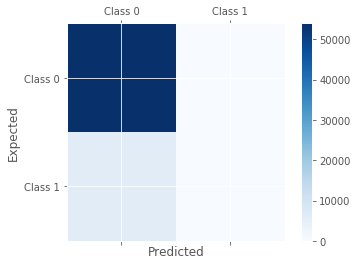

In [16]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

<p>Agora que mostrado o impacto do desbalancemanto irei realizar a reamostragem que pode ser feita de duas formas :</p>
<img src="img/resampling.png" align=”center”>

<p>As duas formas possuem desvantagens</p>
<li>Duplicar registros aleatórios da classe minoritária pode causar superajuste</li>
<li>A remoção de registros aleatórios da classe majoritária pode causar perda de informações.</li>
<p>Recebi muitos concelhos sobre qual técnica aplicar nesta base e fiquei num dilema pois já são 200k registros diminuir parece lógico contudo posso perder dados importantes ,que para mim é mais importante </p></br>
<p>Obtive melhores resultados via Under </p>

<h2>Reamostragem por Undersampling</h2>

In [14]:
# Iremos dividir a base em target 1 e target 0
count_class_0, count_class_1 = transacoesTrain.target.value_counts()

# Divide
df_class_0 = transacoesTrain[transacoesTrain['target'] == 0]
df_class_1 = transacoesTrain[transacoesTrain['target'] == 1]


Random under-sampling:
1    20098
0    20098
Name: target, dtype: int64


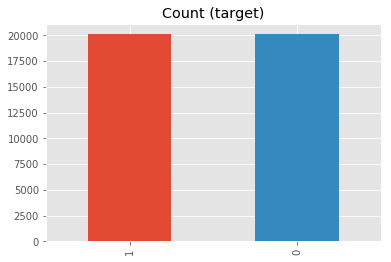

In [8]:
df_class_0_under = df_class_0.sample(count_class_1)
df_base_train_balanceada_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_base_train_balanceada_under.target.value_counts())

df_base_train_balanceada_under.target.value_counts().plot(kind='bar', title='Count (target)');

In [9]:
#Quantidade final de registros
df_base_train_balanceada_under.shape

(40196, 202)

<h1>MODELOS</h1>

<h2>Under + Holdout + Rede Neural</h2>

In [20]:
#HOLDOUT
from sklearn.model_selection import train_test_split
#Eliminado o que não sera usado
a_under = df_base_train_balanceada_under.drop(['target'], axis=1)
a_under =a_under.drop(['ID_code'], axis=1)
# 70% Train and 30% Test
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(a_under, df_base_train_balanceada_under['target'], test_size=0.3)

<h2>REDES NEURAIS</h2>

In [ ]:
#numpy, dependência para trabalharmos com matriz e facilitar o trabalho árduo a ser feito rsrsrs...
import numpy as np

class Rede_Neural():
    
    def __init__(self):
        #Essa parte define o modelo da nossa rede neural ilustrada logo acima.
        self.n_entradas = 200
        self.n_camadas = 20
        self.n_saidas = 2
        #Taxa de aprendizagem, velocidade na qual a descida gradiente acontece.
        self.tr = 0.7
        
        #Matriz de pesos que conectam todos os nossos neurônios através dos links.
        self.w_1 = np.random.rand(self.n_camadas, self.n_entradas) - 0.5
        self.w_2 = np.random.rand(self.n_saidas, self.n_camadas) - 0.5
        
        #Bias, polarização que tem o efeito de aumentar ou diminuir o argumento da função de ativação.
        self.bias_h = np.random.rand(self.n_camadas, 1) - 0.5
        self.bias_o = np.random.rand(self.n_saidas, 1) - 0.5
    
        #Função de ativação sigmoide.
        self.sig = lambda x: 1/(1+np.exp(-x))
        #Derivada da função sigmoide.
        self.dsig = lambda y: y*(1.0-y)
    
    #Backpropagation é um método usado para treinar redes neurais profundas.
    def backpropagation(self, x_tr, y_alvo):
        #Convertendo a entrada para matriz 2d.
        x = np.array(x_tr, ndmin=2).T
        
        #Calculando a saída dos neurônios da camada oculta.
        saida_oculta = self.sig(np.add((np.dot(self.w_1, x)), self.bias_h))
        #Calculando a saída final da rede neural.
        saida_final = self.sig(np.add((np.dot(self.w_2, saida_oculta)), self.bias_o))
        
        #Calculando o erro(A diferença entre a saída alvo e a saída final).
        erro = y_alvo - saida_final
        if (i % 5000) == 0:
            print('Erro:', erro)
        
        #Calculando o erro da camada oculta.
        erro_oculto = np.dot(self.w_2.T, erro)
        
        #Ajustando os pesos pelo delta, com o gradiente da curva sigmoide.
        self.w_2 += self.tr*(np.dot((erro*(self.dsig(saida_final))), np.transpose(saida_oculta)))
        #Ajustando o bias pelo delta, com o gradiente da curva sigmoide(apenas o gradiente).
        self.bias_o += self.tr*(erro*(self.dsig(saida_final)))
        
        #Ajustando os pesos pelo delta, com o gradiente da curva sigmoide.
        self.w_1 += self.tr*(np.dot((erro_oculto*(self.dsig(saida_oculta))), np.transpose(x)))
        #Ajustando o bias pelo delta, com o gradiente da curva sigmoide(apenas o gradiente).
        self.bias_h += self.tr*(erro_oculto*(self.dsig(saida_oculta)))
        
    #Testando o quão bem a nossa rede neural foi treinada, com nossos dados de treinamento.
    def consultar(self, x_con):
        #Converter a entradas para a matriz 2d.
        x = np.array(x_con, ndmin=2).T
        
        #Calculando a saída dos neurônios da camada oculta.
        saida_oculta = self.sig(np.add((np.dot(self.w_1, x)), self.bias_h))
        #Calculando a saída final da rede neural.
        saida_final = self.sig(np.add((np.dot(self.w_2, saida_oculta)), self.bias_o))
        
        return print(saida_final)

In [ ]:
rn = Rede_Neural()

In [ ]:
#Dados xor, usados para treinar a rede neural.
x_treinamento = np.array(X_train_under)
x_treinamento

In [ ]:
#Nossos alvos, usados para obter o erro da nossa rede neural.
y_alvos= np.array(y_train_under)
y_alvos

In [ ]:
#Fazendo 15000 interações para pequenos ajustes.
for i in range(100):
    #Fornecendo nossos dados de entrada, um de cada vez. Ex: x:[1,1] / y:[0]
    for x_tr,y_alvo in zip(x_treinamento, y_alvos):
        rn.backpropagation(x_tr, y_alvo)

<h2>Testando nossa rede neural.</h2>

In [ ]:
x_dados= np.array(X_test_under)

In [ ]:
for x_con in x_dados:
    rn.consultar(x_con)

<h1>Métricas</h1>

<h2>Métricas Under + Holdout + Modelo Randon Forest </h2>

In [53]:
X_train_under.shape, y_train_under.shape ,X_test_under.shape, y_test_under.shape ,y_pred_under.shape

((28137, 200), (28137,), (12059, 200), (12059,), (12059,))

<p>ACURACIA:o quanto a arvore bateu </p>

In [54]:
#Importar o módulo de métricas scikit-learn para o cálculo de precisão
from sklearn import metrics
# Acuracy
metrics.accuracy_score(y_test_under, y_pred_under)

0.7760179119329961

<p>SCORE Para saber quão bem o modelo irá generalizar ou seja, ela serve para saber se o modelo será efetivo ao receber um dado que ele nunca viu na vida</p>

In [26]:
clf_under.score(X_train_under, y_train_under)

1.0

<h3>Matriz de Confusão</h3>

In [27]:
pd.crosstab(y_test_under,y_pred_under,rownames=['Real'],colnames=['Predito'],margins=True)

Predito,0,1,All
Real,,,
0,4516,1499,6015
1,1202,4842,6044
All,5718,6341,12059


In [29]:
#O Método confusion_matrix retorna a matriz de confusão
from sklearn.metrics import confusion_matrix 
#Verdadeiro Positivo,Falso Positivo, Falso Negativo e Verdadeiro Negativo
confusion_matrix(y_pred_under,y_pred_under)


array([[5718,    0],
       [   0, 6341]], dtype=int64)

<h3>Visualização da matriz</h3>

Confusion matrix:
 [[5718    0]
 [   0 6341]]


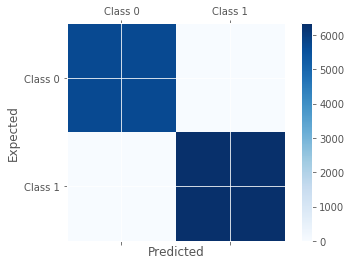

In [35]:
conf_mat = confusion_matrix(y_true=y_pred_under, y_pred=y_pred_under)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

<h3>Ordem de importância dos dados analizados no modelo</h3>

In [58]:
#Mede a importância de cada feature
features = X_train_under
features_importance = zip(clf_under.feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

var_81: 1.652086%
var_12: 1.342047%
var_139: 1.274734%
var_26: 1.023797%
var_110: 1.015978%
var_146: 0.948139%
var_174: 0.935147%
var_53: 0.909447%
var_22: 0.892811%
var_6: 0.882190%
var_148: 0.867834%
var_21: 0.838621%
var_2: 0.836774%
var_99: 0.832920%
var_133: 0.827101%
var_80: 0.825509%
var_166: 0.760369%
var_34: 0.752222%
var_165: 0.750412%
var_109: 0.738958%
var_76: 0.734362%
var_198: 0.733487%
var_13: 0.718877%
var_0: 0.716102%
var_44: 0.691864%
var_191: 0.681085%
var_164: 0.678837%
var_190: 0.677404%
var_40: 0.658660%
var_154: 0.652182%
var_170: 0.648441%
var_179: 0.645767%
var_78: 0.642148%
var_115: 0.635369%
var_92: 0.631724%
var_33: 0.626347%
var_149: 0.626306%
var_123: 0.598612%
var_1: 0.596817%
var_169: 0.577769%
var_177: 0.571929%
var_108: 0.568922%
var_9: 0.563131%
var_94: 0.562608%
var_91: 0.556454%
var_18: 0.546912%
var_172: 0.539708%
var_75: 0.536119%
var_184: 0.535982%
var_122: 0.535564%
var_67: 0.532323%
var_192: 0.526547%
var_173: 0.525015%
var_121: 0.524075%
var_5